Dataset Loaded Successfully!
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


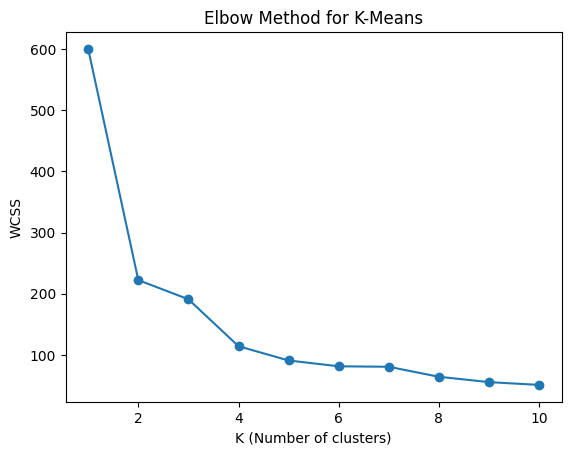


Cluster labels added to dataframe:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


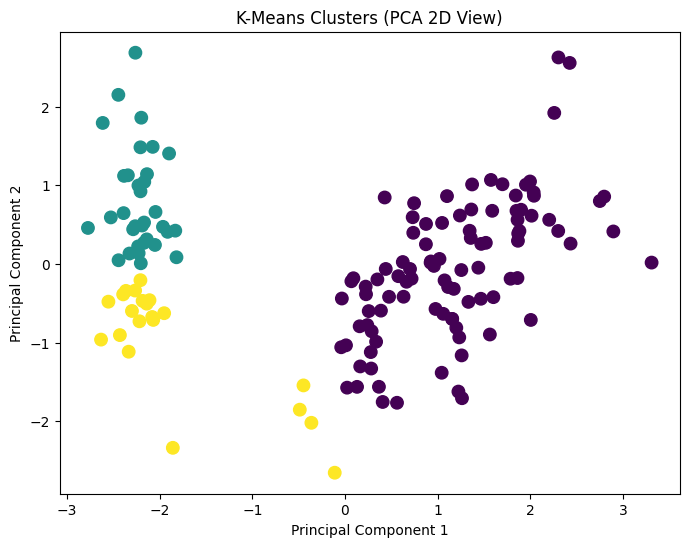


Silhouette Score: 0.4798814508199817


In [4]:
# ---------------------------------------------
# TASK 8: K-MEANS CLUSTERING (IRIS DATASET)
# ---------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# -----------------------
# STEP 1: LOAD IRIS DATASET
# -----------------------
iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)

print("Dataset Loaded Successfully!")
print(df.head())

# -----------------------
# STEP 2: SCALE THE DATA
# -----------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# STEP 3: ELBOW METHOD
# -------------------------------
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('K (Number of clusters)')
plt.ylabel('WCSS')
plt.show()

# -------------------------------
# STEP 4: FIT K-MEANS (Choose K=3)
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels
print("\nCluster labels added to dataframe:")
print(df.head())

# -------------------------------
# STEP 5: PCA for 2D Visualization
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=80)
plt.title("K-Means Clusters (PCA 2D View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# -------------------------------
# STEP 6: SILHOUETTE SCORE
# -------------------------------
score = silhouette_score(X_scaled, labels)
print("\nSilhouette Score:", score)
